In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:
df_train = pd.read_csv('titanic_train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_train.isnull()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

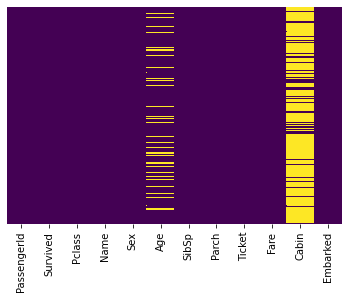

In [9]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Checking who survived and who died

<AxesSubplot:xlabel='Survived', ylabel='count'>

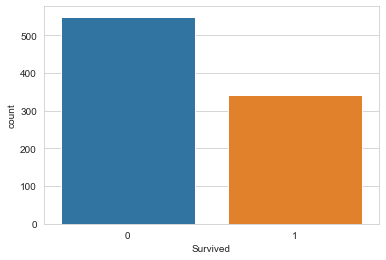

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df_train)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

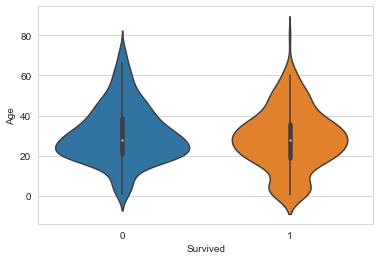

In [12]:
sns.violinplot(x='Survived',y='Age',data=df_train)

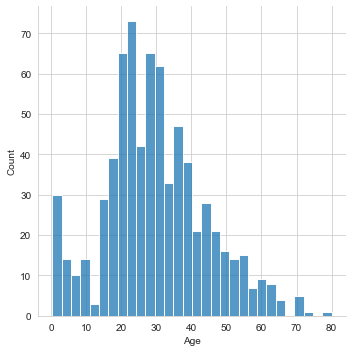

In [14]:
# remove nan values from age
sns.displot(df_train['Age'].dropna(),bins=30)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# NUmberof subling or spouse

<AxesSubplot:xlabel='SibSp', ylabel='count'>

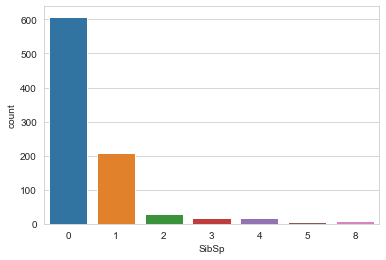

In [16]:
sns.countplot(x='SibSp',data=df_train)

# Number of Parents

<AxesSubplot:xlabel='Parch', ylabel='count'>

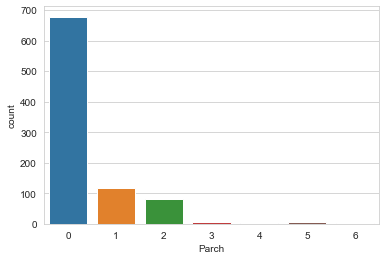

In [18]:
sns.countplot(x='Parch',data=df_train)

# Fare



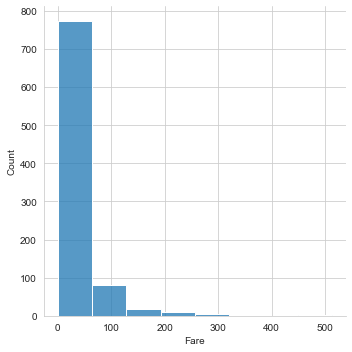

In [20]:
sns.displot(df_train['Fare'],bins=8)

## Cleaning the data

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

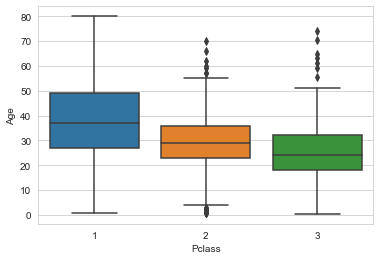

In [25]:
sns.boxplot(x='Pclass',y='Age',data=df_train)

In [26]:
##  Most of the age of people  on 1st class is around 37 , second class is 27 and third class is 24

## Cleaning function
### removing NAN from Age and inserting some values

In [49]:
def impute_age(colmn):
    Age = colmn[0]
    Pclass = colmn[1]
    
    if pd.isnull(Age):
    
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 27
        else:
            return 24
        
    else:
        return Age

    

In [50]:
df_train['Age'] = df_train[['Age','Pclass']].apply(impute_age,axis=1)

In [51]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Dropping cabbin col

In [53]:
df_train.drop('Cabin',axis=1,inplace=True)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Removing only one value(that is nan) in embarked

In [55]:
df_train.dropna(inplace=True)


## Creating the dummy variables

In [60]:
sex=pd.get_dummies(df_train['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [62]:
embark = pd.get_dummies(df_train['Embarked'],drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


## Adding male,q,s columns

In [63]:
df_train = pd.concat([df_train,sex,embark],axis=1)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


## Dropping cols that are of no longer use to us

In [64]:
df_train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [65]:
df_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


## Creating dummies  of parch



In [69]:
parch = pd.get_dummies(df_train['Parch'],drop_first=True)
parch

,1,2,3,4,5,6
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
886,0,0,0,0,0,0
887,0,0,0,0,0,0
888,0,1,0,0,0,0
889,0,0,0,0,0,0


## concating parch

In [71]:
df_train = pd.concat([df_train,parch],axis=1)

In [72]:
df_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,1,2,3,4,5,6
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,0,0,0,0,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1,0,0,0,0,0,0
887,888,1,1,19.0,0,0,30.0000,0,0,1,0,0,0,0,0,0
888,889,0,3,24.0,1,2,23.4500,0,0,1,0,1,0,0,0,0
889,890,1,1,26.0,0,0,30.0000,1,0,0,0,0,0,0,0,0


## Dropping the na

In [75]:
df_train.drop(['Parch'],inplace=True,axis=1)
df_train

,PassengerId,Survived,Pclass,Age,SibSp,Fare,male,Q,S,1,2,3,4,5,6
0,1,0,3,22.0,1,7.2500,1,0,1,0,0,0,0,0,0
1,2,1,1,38.0,1,71.2833,0,0,0,0,0,0,0,0,0
2,3,1,3,26.0,0,7.9250,0,0,1,0,0,0,0,0,0
3,4,1,1,35.0,1,53.1000,0,0,1,0,0,0,0,0,0
4,5,0,3,35.0,0,8.0500,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,13.0000,1,0,1,0,0,0,0,0,0
887,888,1,1,19.0,0,30.0000,0,0,1,0,0,0,0,0,0
888,889,0,3,24.0,1,23.4500,0,0,1,0,1,0,0,0,0
889,890,1,1,26.0,0,30.0000,1,0,0,0,0,0,0,0,0


## Removing the passenger id

In [77]:
df_train.drop(['PassengerId'],inplace=True,axis=1)
df_train

,Survived,Pclass,Age,SibSp,Fare,male,Q,S,1,2,3,4,5,6
0,0,3,22.0,1,7.2500,1,0,1,0,0,0,0,0,0
1,1,1,38.0,1,71.2833,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,7.9250,0,0,1,0,0,0,0,0,0
3,1,1,35.0,1,53.1000,0,0,1,0,0,0,0,0,0
4,0,3,35.0,0,8.0500,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,13.0000,1,0,1,0,0,0,0,0,0
887,1,1,19.0,0,30.0000,0,0,1,0,0,0,0,0,0
888,0,3,24.0,1,23.4500,0,0,1,0,1,0,0,0,0
889,1,1,26.0,0,30.0000,1,0,0,0,0,0,0,0,0


## Defining X and y

In [84]:
X = df_train.iloc[:,1:]
y = df_train.iloc[:,0]
print(f'\nX is\n{X} and y is\n {y}')


X is
     Pclass   Age  SibSp     Fare  male  Q  S  1  2  3  4  5  6
0         3  22.0      1   7.2500     1  0  1  0  0  0  0  0  0
1         1  38.0      1  71.2833     0  0  0  0  0  0  0  0  0
2         3  26.0      0   7.9250     0  0  1  0  0  0  0  0  0
3         1  35.0      1  53.1000     0  0  1  0  0  0  0  0  0
4         3  35.0      0   8.0500     1  0  1  0  0  0  0  0  0
..      ...   ...    ...      ...   ... .. .. .. .. .. .. .. ..
886       2  27.0      0  13.0000     1  0  1  0  0  0  0  0  0
887       1  19.0      0  30.0000     0  0  1  0  0  0  0  0  0
888       3  24.0      1  23.4500     0  0  1  0  1  0  0  0  0
889       1  26.0      0  30.0000     1  0  0  0  0  0  0  0  0
890       3  32.0      0   7.7500     1  1  0  0  0  0  0  0  0

[889 rows x 13 columns] and y is
 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


## Splitting training ans test set


In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
print(f'\nX_train is\n{X_train}\ny_train is\n ,{y_train} \n X_test is\n ,{X_test} \n y_test is\n ,{y_test})')


X_train is
     Pclass   Age  SibSp     Fare  male  Q  S  1  2  3  4  5  6
807       3  18.0      0   7.7750     0  0  1  0  0  0  0  0  0
651       2  18.0      0  23.0000     0  0  1  1  0  0  0  0  0
2         3  26.0      0   7.9250     0  0  1  0  0  0  0  0  0
690       1  31.0      1  57.0000     1  0  1  0  0  0  0  0  0
196       3  24.0      0   7.7500     1  1  0  0  0  0  0  0  0
..      ...   ...    ...      ...   ... .. .. .. .. .. .. .. ..
576       2  34.0      0  13.0000     0  0  1  0  0  0  0  0  0
840       3  20.0      0   7.9250     1  0  1  0  0  0  0  0  0
338       3  45.0      0   8.0500     1  0  1  0  0  0  0  0  0
524       3  24.0      0   7.2292     1  0  0  0  0  0  0  0  0
865       2  42.0      0  13.0000     0  0  1  0  0  0  0  0  0

[622 rows x 13 columns]
y_train is
 ,807    0
651    1
2      1
690    1
196    0
      ..
576    1
840    0
338    1
524    0
865    1
Name: Survived, Length: 622, dtype: int64 
 X_test is
 ,     Pclass   Age  SibSp   

## Fitting the model

In [91]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

## Predicting the model

In [93]:
predictions = classifier.predict(X_test)
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)

## Classification report

In [95]:
from sklearn.metrics import classification_report
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       183
           1       0.65      0.81      0.72        84

    accuracy                           0.81       267
   macro avg       0.78      0.81      0.79       267
weighted avg       0.82      0.81      0.81       267



## Creating confusion metrics

In [96]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predictions,y_test)
cm

array([[147,  36],
       [ 16,  68]], dtype=int64)

_______________

### LEt's make channges in our model

_________________

In [ ]:
## See another file(in same directry) called  Titanic_complete

In [ ]:
! git add Titanic_Parch_update.ipynb
! git commit -m ""